## Binary Classification
Supervised learning technique that involves training a model on labelled data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load dataset

activity = pd.read_csv('creditcard.csv')

In [3]:
activity.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

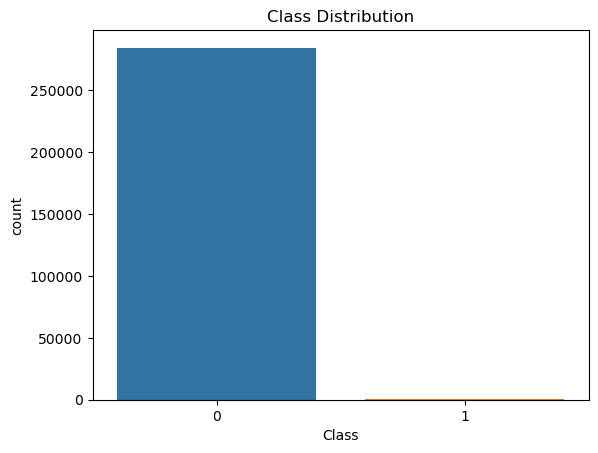

In [6]:
# Plot the class distribution

sns.countplot(x='Class', data=activity)
plt.title('Class Distribution')
plt.show()

In [7]:
# Feature scaling

scaler = StandardScaler()
activity['Amount'] = scaler.fit_transform(activity['Amount'].values.reshape(-1,1))
activity['Time'] = scaler.fit_transform(activity['Time'].values.reshape(-1,1))

In [8]:
# Split and train dataset

X_train, X_test, y_train, y_test = train_test_split(activity.drop('Class', axis=1), activity['Class'], test_size=0.2, random_state=42)

In [9]:
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
import tensorflow as tf

2024-02-22 14:11:15.348711: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Build a feedforward neural network

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.001  # can adjust this value based on your needs
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [11]:
# Compile the model

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [12]:
# Train the model

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 3/10
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0038 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 4/10
7121/7121 [==============================] - 14s 2ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 5/10
7121/7121 [==============================] - 15s 2ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9993
Epoch 6/10
7121/7121 [==============================] - 18s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 7/10
7121/7121 [==============================] - 18s 3ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0030 - val_ac

In [13]:
# Predictions on the test set

y_prediction = (model.predict(X_test) > 0.5).astype(int)

1781/1781 [==============================] - 3s 2ms/step


In [15]:
def evaluate_model(y_true, y_pred):
    print('Precision Score:', precision_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_prediction))
    print('Classification Report:')
    print(classification_report(y_test, y_prediction))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_prediction))

evaluate_model(y_test, y_prediction)

Precision Score: 0.8765432098765432
Recall Score: 0.7244897959183674
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56854    10]
 [   27    71]]


## Anomaly Detection
Unsupervised or semi-supervised technique that focuses on identifying instances that deviate significantly from the norm

### Isolation Forest
- Ensemble learning method that isolates instances by randomly selecting a feature and then selecting a split value between the max and min values of the feature
- Builds a tree structure and the number of splits required to isolare an instance is used as a measure of anomaly

In Fraud Detection: Unusual instances will require fewer splits to be isolated

In [16]:
from sklearn.ensemble import IsolationForest

if_model = IsolationForest(contamination=0.02, random_state=42)  #contamination = the proportion of outliers in the data set

if_model.fit(X_train)

if_preds = if_model.predict(X_test)

if_preds[if_preds == 1] = 0  #normal transactions are labeled as 1, so change it to 0

if_preds[if_preds == -1] = 1  #fraudulent transactions are labeled as -1, so change it to 1

print('Isolation Forest:')
evaluate_model(y_test, if_preds)

/Users/nikiyaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest:
Precision Score: 0.06568712186689715
Recall Score: 0.7244897959183674
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56854    10]
 [   27    71]]


### K-means
- Clustering algorithm that partitions data into K clusters based on similarity
- Each cluster is represented by its centroid, and instances are assigned to the cluster with the nearest centroid

In Fraud Detection: Anomalies might be detected by considering instances that do not belong to any well-defined cluster

In [22]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2, random_state=42)

kmeans_model.fit(X_train.values)

kmeans_preds = kmeans_model.predict(X_test)

print('K-means:')
evaluate_model(y_test, kmeans_preds)

/Users/nikiyaw/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/nikiyaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


K-means:
Precision Score: 0.0026656004264960682
Recall Score: 0.7244897959183674
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56854    10]
 [   27    71]]


### One-Class SVM (Support Vector Machine)
- Type of SVM that learns a decision boundary around normal instances
- Aims to separate normal instances from potential outliers

In Fraud Detection: Useful when there is a significant class imbalance, focusing on learning the structure of normal transactions

In [24]:
from sklearn.svm import OneClassSVM

svm_model = OneClassSVM(kernel='rbf', nu=0.01)

svm_model.fit(X_train)

svm_preds = svm_model.predict(X_test)

svm_preds[svm_preds == 1] = 0

svm_preds[svm_preds == -1] = 1

print('One-Class SVM:')
evaluate_model(y_test, svm_preds)

One-Class SVM:
Precision Score: 0.08823529411764706
Recall Score: 0.7244897959183674
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56854    10]
 [   27    71]]
